# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Chris Andrew Mendoza \
_Student No._: 2019-02636 \
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: May 23, 2024 (11:59 PM)

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Chris Andrew Mendoza

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

Nodes: ['Jill', 'Mike', 'Bob', 'John', 'Leah', 'Shane', 'Emma', 'Liz', 'Allen', 'Lisa']
Edges: [('Jill', 'Mike'), ('Jill', 'Bob'), ('Jill', 'John'), ('Jill', 'Leah'), ('Jill', 'Shane'), ('Jill', 'Emma'), ('Mike', 'Bob'), ('Mike', 'Emma'), ('Bob', 'Emma'), ('Bob', 'John'), ('John', 'Shane'), ('John', 'Leah'), ('Leah', 'Shane'), ('Shane', 'Emma'), ('Shane', 'Liz'), ('Emma', 'Liz'), ('Liz', 'Allen'), ('Allen', 'Lisa')]
Diameter of the network: 4
Density of the network: 0.4
Average degree of the network: 3.6


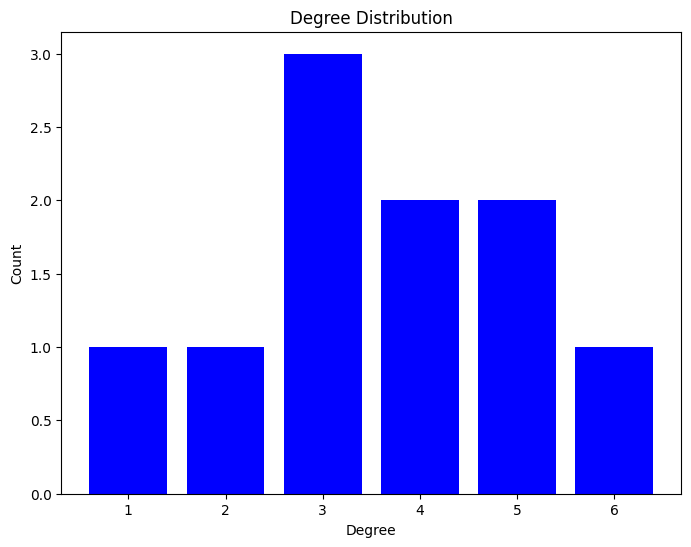

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes and edges according to the given friendships
edges = [
    ('Jill', 'Mike'), ('Jill', 'Bob'), ('Jill', 'John'), ('Jill', 'Leah'),
    ('Jill', 'Shane'), ('Jill', 'Emma'),
    ('Bob', 'Mike'), ('Bob', 'Jill'), ('Bob', 'Emma'), ('Bob', 'John'),
    ('John', 'Bob'), ('John', 'Jill'), ('John', 'Shane'), ('John', 'Leah'),
    ('Leah', 'John'), ('Leah', 'Jill'), ('Leah', 'Shane'),
    ('Shane', 'Leah'), ('Shane', 'Jill'), ('Shane', 'Emma'), ('Shane', 'Liz'),
    ('Emma', 'Mike'), ('Emma', 'Liz'), ('Emma', 'Shane'), ('Emma', 'Jill'), ('Emma', 'Bob'),
    ('Liz', 'Emma'), ('Liz', 'Allen'), ('Liz', 'Shane'),
    ('Allen', 'Liz'), ('Allen', 'Lisa'),
    ('Lisa', 'Allen')
]

G.add_edges_from(edges)

# Check nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# Calculate network characteristics

# Diameter
diameter = nx.diameter(G)
print("Diameter of the network:", diameter)

# Density
density = nx.density(G)
print("Density of the network:", density)

# Average Degree
average_degree = sum(dict(G.degree()).values()) / len(G.nodes())
print("Average degree of the network:", average_degree)

# Degree distribution plot
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = {}
for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1

degrees, counts = zip(*degree_count.items())

plt.figure(figsize=(8, 6))
plt.bar(degrees, counts, width=0.80, color='b')

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# **DISCUSSION**

The degree distribution plot shows a summary of how many friends the individuals ar connected to. It can be observed that 3 individuals in the social network is connected with 3 other individuals. A degree of 3 is the mode of this distribution. Note that most of the individuals' degrees lie on the 3-5 range while only few lie on the extreme ends. This is also reflected by the calculated average degree of the network which us 3.6. This means that for the majority of individuals in the network, they are at least friends with 3 or 4 other people in the same network. Only 1 individual is friends either with 1 or 2 people at the most (extremely introverted) and there is also only 1 individual who is friends with 6 people (extremely extroverted).

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [ ]:
import pandas as pd

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Create a DataFrame to store the centrality measures
centrality_data = {
    'Name': [],
    'Degree Centrality': [],
    'Betweenness Centrality': [],
    'Closeness Centrality': []
}

for node in G.nodes():
    centrality_data['Name'].append(node)
    centrality_data['Degree Centrality'].append(degree_centrality[node])
    centrality_data['Betweenness Centrality'].append(betweenness_centrality[node])
    centrality_data['Closeness Centrality'].append(closeness_centrality[node])

centrality_df = pd.DataFrame(centrality_data)

# Display the DataFrame
print(centrality_df)

    Name  Degree Centrality  Betweenness Centrality  Closeness Centrality
0   Jill           0.666667                0.101852              0.600000
1   Mike           0.333333                0.000000              0.500000
2    Bob           0.444444                0.023148              0.529412
3   John           0.444444                0.023148              0.529412
4   Leah           0.333333                0.000000              0.500000
5  Shane           0.555556                0.231481              0.642857
6   Emma           0.555556                0.231481              0.642857
7    Liz           0.333333                0.388889              0.600000
8  Allen           0.222222                0.222222              0.428571
9   Lisa           0.111111                0.000000              0.310345


# **DISCUSSION**

In terms of degree centrality aka the individual who is has the most number of connections/friends, that would be Jill. In the network diagram, it can be seen that she is directly connected to 6 other people. In terms of betweenness centrality, Liz is the individual who bridges lots of paths/connections to the other nodes. This means that she is very central in tying people who are not friends with each other to the social network. Lastly, in terms of closeness centrality, both Shane and Emma tie for the most central person as they both are included in most of the shortest paths between 2 other nodes (people). Essentially, they are the "closest" to most people in the entire network.

#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

In [ ]:
from community import community_louvain

# Apply Louvain community detection
louvain_partition = community_louvain.best_partition(G)

# Calculate modularity
louvain_modularity = community_louvain.modularity(louvain_partition, G)
print("Louvain Modularity:", louvain_modularity)

Louvain Modularity: 0.2222222222222222


DISCUSSION

The Louvain method for community detection is a method to extract non-overlapping communities from large networks [1]. The method is based on modularity optimization. Modularity is a metric that quantifies the strength of division of a network into communities. Higher modularity values indicate a stronger community structure. The goal is to maximize the modularity score, which compares the density of edges inside communities with the density of edges between communities. Here, it can be seen the the modularity score for our given network is rather low at 0.222 which means that the network has a weak structure.






References:

[1] Blondel, Vincent D; Guillaume, Jean-Loup; Lambiotte, Renaud; Lefebvre, Etienne (9 October 2008). "Fast unfolding of communities in large networks". Journal of Statistical Mechanics: Theory and Experiment. 2008 (10): P10008. arXiv:0803.0476. Bibcode:2008JSMTE..10..008B. doi:10.1088/1742-5468/2008/10/P10008. S2CID 334423

In [ ]:
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity

# Apply Girvan-Newman community detection
comp = girvan_newman(G)
# Get the first level of the partition
first_level_partition = next(comp)

# Convert partition format to a dictionary as required by modularity function
gn_partition = {node: idx for idx, community in enumerate(first_level_partition) for node in community}

# Calculate modularity
gn_modularity = modularity(G, first_level_partition)
print("Girvan-Newman Modularity:", gn_modularity)

Girvan-Newman Modularity: 0.09722222222222227


# **DISCUSSION**

The Girvan-Newman method, named after Michelle Girvan and Mark Newman, is a hierarchical method used to detect communities in complex systems by progressively removing edges from the original network [2]. The alogrithm removes edges with the highest betweenness centrality, effectively dismantling the network into smaller, more tightly-knit groups. Here, we can see that the modularity score is even lower at 0.0972 for our given network, reiterating the conclusion that our network has a weak structure.

References:
[2]  Girvan M. and Newman M. E. J., Community structure in social and biological networks, Proc. Natl. Acad. Sci. USA 99, 7821–7826 (2002)